# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Dimas Maulana Ishaq
- Email: dimasmaulanaishaq01@gmail.com
- Id Dicoding: dimas_maulana_ishaq

## Persiapan

### Menyiapkan library yang dibutuhkan

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#lib util
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay, accuracy_score
import joblib

# lib models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier



### Menyiapkan data yang akan diguankan

## Data Understanding

#### Exploratory Data Analysis
Menyiapkan pertanyaan :
 1. Berapa besar presentase siswa yang "Graduated", "Enrolled", dan "Dropout" pada dataset yang dianalysis ?
 2. Apa saja faktor - faktor yang memiliki korelasi cukup kuat yang menjadi alasan siswa melakukan "Dropout" ?
 3. Jenis Course mana saja yang diambil siswa dan memiliki tingkat dropout paling banyak ?
 4. Apakah fitur nationality berpengaruh secara signifikan pada tingginya tingkat dropout siswa ?
 5. Bagaimana persebaran data gender berdasarkan tingkat dropout siswa, apa kesimpulannya ?

In [53]:
raw_data = 'https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/students_performance/data.csv'
main_df = pd.read_csv(raw_data, sep=";")
main_df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [54]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

##### Ringkasan singkat :
- Jumlah data : 4424
- Jumlah fitur : 37
- Tipe data: float64(7), int64(29), object(1)

In [55]:
main_df.isnull().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


* Tidak ditemukan nilai atau value yang invalid

In [56]:
main_df.duplicated().sum()

np.int64(0)

* Tidak ditemukan adanya duplikasi data

In [57]:
main_df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


* Rentang data pada setiap fitur sudah sesuai dengan deksripsi dataset

In [58]:
status_df_count = main_df["Status"].value_counts()
print(status_df_count)

Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


/tmp/ipykernel_4154/2880387214.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=main_df, x="Status", ax=axes[0], palette="magma")


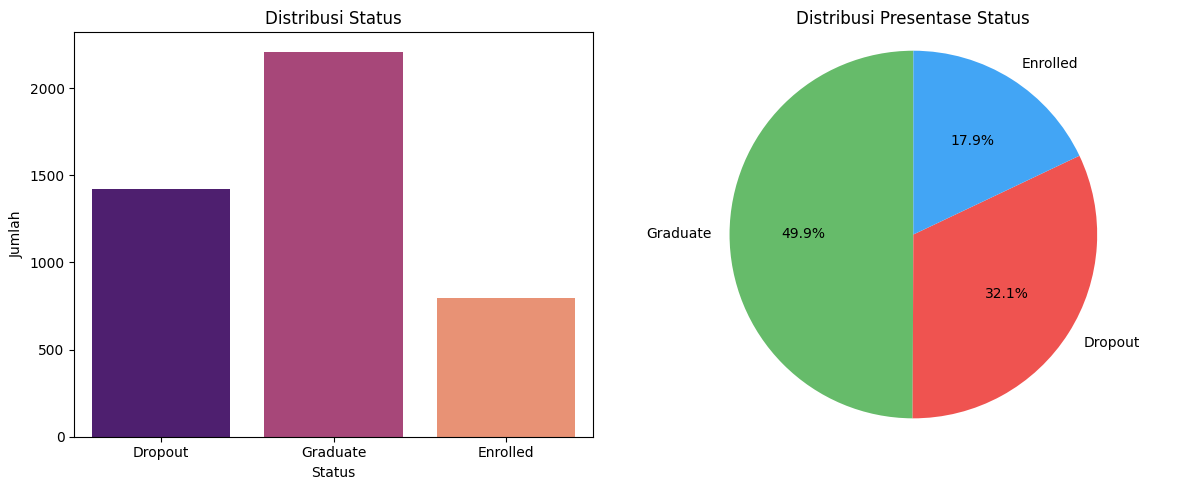

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Visualisasi Bar
sns.countplot(data=main_df, x="Status", ax=axes[0], palette="magma")
axes[0].set_title("Distribusi Status")
axes[0].set_xlabel("Status")
axes[0].set_ylabel("Jumlah")

# Visualisasi Presentase
custom_palette_pie = ["#66BB6A","#EF5350", "#42A5F5", ]
axes[1].pie(status_df_count.values, labels=status_df_count.index, autopct='%1.1f%%',
            startangle=90, colors=custom_palette_pie)
axes[1].set_title("Distribusi Presentase Status")
axes[1].axis('equal') 

plt.tight_layout()
plt.show()

##### Ringkasan singkat :
 - Distribusi data pada fitur "Status" adalah Dropout sejumlah 1421, Graduate sejumlah 2209 dan Enrolled sejumlah 794 
 - Distribusi data pada fitur "Status" dengan presentase didapati bawha Graduate sebesar 49.9%, Dropout sebesar 32,1% dan Enrolled sebesar 17.9%

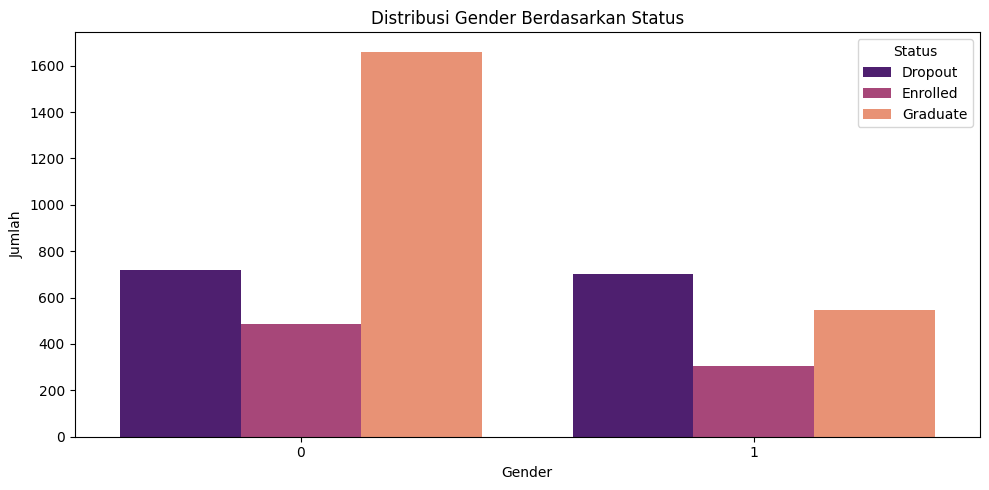

In [60]:
gender_df = main_df.groupby(["Gender", "Status"]).size().reset_index(name='Jumlah')

# Buat plot
fig, ax = plt.subplots(figsize=(10, 5))

# Visualisasi Barplot berdasarkan hasil groupby
sns.barplot(data=gender_df, x="Gender", y="Jumlah", hue="Status", ax=ax, palette="magma")
ax.set_title("Distribusi Gender Berdasarkan Status")
ax.set_xlabel("Gender")
ax.set_ylabel("Jumlah")

plt.tight_layout()
plt.show()

In [61]:
print(gender_df.value_counts())

Gender  Status    Jumlah
0       Dropout   720       1
        Enrolled  487       1
        Graduate  1661      1
1       Dropout   701       1
        Enrolled  307       1
        Graduate  548       1
Name: count, dtype: int64


##### Ringkasan singkat :

Distribusi dataset berdasarkan "Gender" dan "Status" :

- Mahasiswa Laki-laki (Gender = 0) mendominasi jumlah total mahasiswa dengan 2.868 orang, hampir dua kali lipat dari perempuan (1.556 orang).
- Persentase kelulusan (Graduate) pada laki-laki lebih tinggi secara absolut, yaitu 1.661 orang, dibandingkan perempuan hanya 548 orang.
- Jumlah Dropout hampir seimbang antara laki-laki (720) dan perempuan (701), menunjukkan bahwa risiko putus studi tidak terlalu dipengaruhi oleh gender.
- Jumlah mahasiswa yang masih aktif (Enrolled) lebih banyak pada laki-laki (487) daripada perempuan (307), namun selisihnya tidak sebesar kategori lainnya.
- Secara keseluruhan, laki-laki lebih banyak terwakili dalam seluruh status, tetapi tingkat kelulusan mereka juga secara absolut lebih tinggi dibanding perempuan.

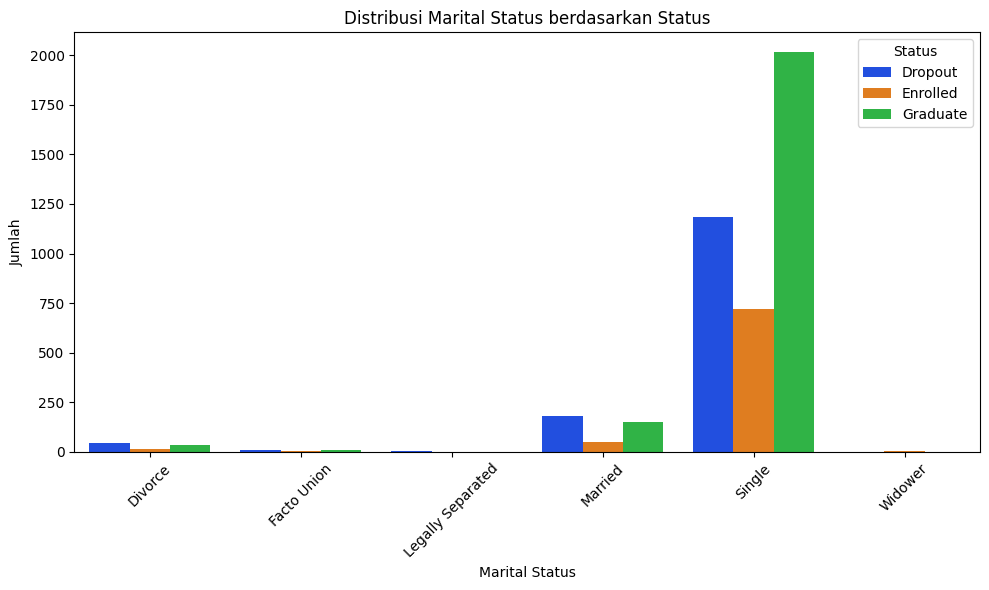

In [62]:
marital_status_categorical = {
    1:"Single",
    2:"Married",
    3:"Widower",
    4:"Divorce",
    5:"Facto Union",
    6:"Legally Separated"
}
marital_status_df = main_df.replace({"Marital_status":marital_status_categorical}).groupby(['Marital_status', 'Status']).size().reset_index(name="Jumlah")

plt.figure(figsize=(10,6)) 
# Visualisasi Bar
sns.barplot(data=marital_status_df, x='Marital_status', y='Jumlah', hue='Status', palette='bright')
plt.title("Distribusi Marital Status berdasarkan Status")
plt.xlabel("Marital Status")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [63]:
marital_status_df.value_counts()

Marital_status     Status    Jumlah
Divorce            Dropout   42        1
                   Enrolled  16        1
                   Graduate  33        1
Facto Union        Dropout   11        1
                   Enrolled  3         1
                   Graduate  11        1
Legally Separated  Dropout   4         1
                   Enrolled  1         1
                   Graduate  1         1
Married            Dropout   179       1
                   Enrolled  52        1
                   Graduate  148       1
Single             Dropout   1184      1
                   Enrolled  720       1
                   Graduate  2015      1
Widower            Dropout   1         1
                   Enrolled  2         1
                   Graduate  1         1
Name: count, dtype: int64

##### Ringkasan singkat ;
Distribusi dataset berdasarkan "Marital_status" dan "Status" didapati bahwa ;
- Siswa dengan dropout tertinggi berstatus "Single" sejumlah 1184
- Siswa dengan graduate tertinggi berstatus "Single" sejumlah 2015
- Jika dilihat dari perbandingan antara dropout dan graduated dengan jumlah siswa pada "Marital_status" tertentu, siswa dengan status "Married" memiliki tingkat dropout lebih tinggi.

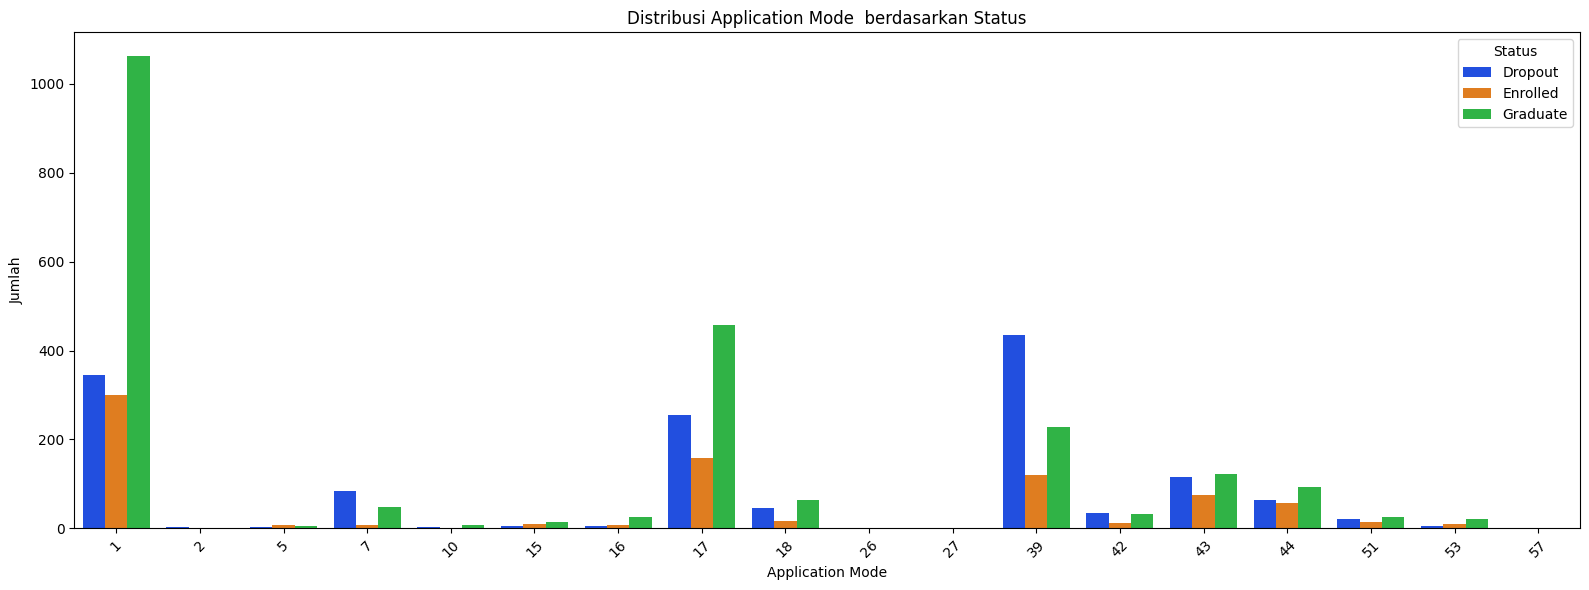

In [64]:

application_mode_df = main_df.groupby(['Application_mode', 'Status']).size().reset_index(name="Jumlah")

plt.figure(figsize=(16,6)) 
# Visualisasi Bar
sns.barplot(data=application_mode_df, x='Application_mode', y='Jumlah', hue='Status', palette='bright')
plt.title("Distribusi Application Mode  berdasarkan Status")
plt.xlabel("Application Mode")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [65]:
application_mode_categorical = {
    1: "1st phase - general contingent",
    2: "Ordinance No. 612/93",
    5: "1st phase - special contingent (Azores Island)",
    7: "Holders of other higher courses",
    10: "Ordinance No. 854-B/99",
    15: "International student (bachelor)",
    16: "1st phase - special contingent (Madeira Island)",
    17: "2nd phase - general contingent",
    18: "3rd phase - general contingent",
    26: "Ordinance No. 533-A/99, item b2) (Different Plan)",
    27: "Ordinance No. 533-A/99, item b3 (Other Institution)",
    39: "Over 23 years old",
    42: "Transfer",
    43: "Change of course",
    44: "Technological specialization diploma holders",
    51: "Change of institution/course",
    53: "Short cycle diploma holders",
    57: "Change of institution/course (International)"
}
application_mode = main_df[["Application_mode","Status"]].replace(application_mode_categorical)
application_mode.value_counts()

Application_mode                                     Status  
1st phase - general contingent                       Graduate    1063
2nd phase - general contingent                       Graduate     457
Over 23 years old                                    Dropout      435
1st phase - general contingent                       Dropout      345
                                                     Enrolled     300
2nd phase - general contingent                       Dropout      256
Over 23 years old                                    Graduate     229
2nd phase - general contingent                       Enrolled     159
Change of course                                     Graduate     122
Over 23 years old                                    Enrolled     121
Change of course                                     Dropout      115
Technological specialization diploma holders         Graduate      94
Holders of other higher courses                      Dropout       85
Change of course            

##### Ringkasan singkat :

Distribusi dataset berdasarkan "Application Mode" dan "Status" :
- Mahasiswa dengan jumlah status "Graduate" tertinggi mendaftar ke perguruan tinggi dengan mode "1st phase - general contingent " sejumlah 1063 mahasiswa dengan jumlah "Dropout" 345 mahasiswa
- Mahasiswa dengan jumlah status "Dropout" tertinggi mendaftar ke perguruan tinggi dengan mode "Over 23 years old " sejumlah 435 mahasiswa dengan jumlah "Graduate" 229 mahasiswa
- Mahasiswa dengan jumlah status "Enrolled" tertinggi mendaftar ke perguruan tinggi dengan mode "1st phase - general contingent" sejumlah 300 mahasiswa
- Mahasiswa dengan mode "Change Of Course" memiliki perbandingan yang cukup signifikan antara status "Dropout" dan "Graduated" , dengan jumlah status "Enrolled" sekitar 24,1%

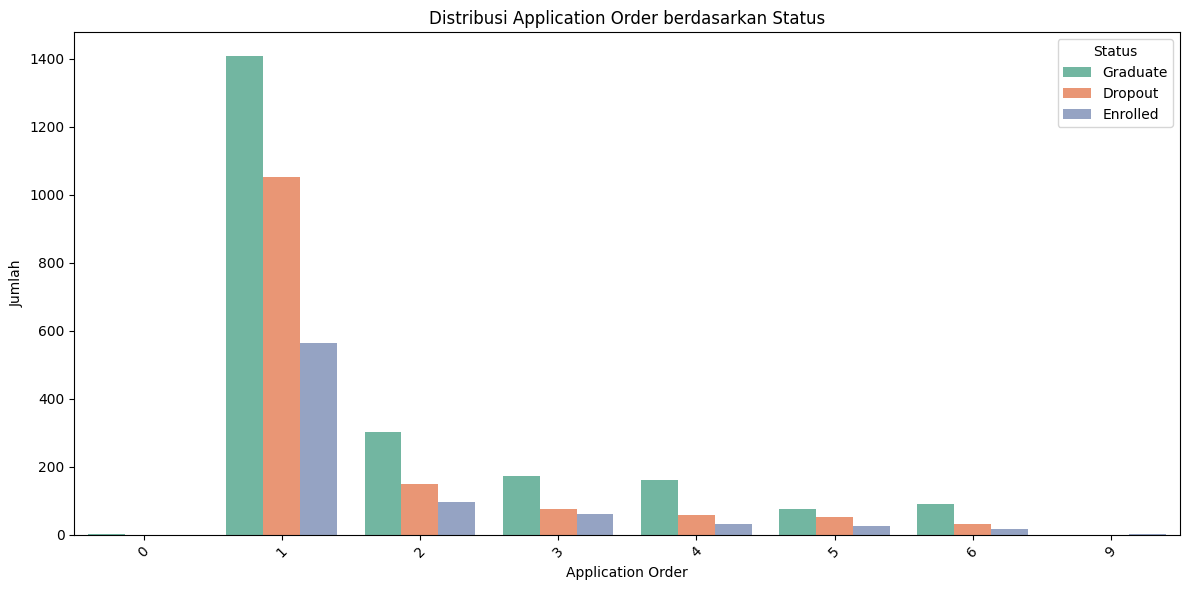

In [66]:
application_order_df = main_df.groupby(['Application_order', 'Status']).size().reset_index(name="Jumlah")

plt.figure(figsize=(12,6)) 
# Visualisasi Bar
sns.barplot(data=application_order_df, x='Application_order', y='Jumlah', hue='Status', palette='Set2')
plt.title("Distribusi Application Order berdasarkan Status")
plt.xlabel("Application Order")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [67]:
application_order_df.value_counts()

Application_order  Status    Jumlah
0                  Graduate  1         1
1                  Dropout   1053      1
                   Enrolled  565       1
                   Graduate  1408      1
2                  Dropout   150       1
                   Enrolled  96        1
                   Graduate  301       1
3                  Dropout   76        1
                   Enrolled  60        1
                   Graduate  173       1
4                  Dropout   58        1
                   Enrolled  31        1
                   Graduate  160       1
5                  Dropout   53        1
                   Enrolled  25        1
                   Graduate  76        1
6                  Dropout   31        1
                   Enrolled  16        1
                   Graduate  90        1
9                  Enrolled  1         1
Name: count, dtype: int64

##### Ringkasan singkat :

Distribusi dataset berdasarkan "Application Order" dan "Status" :
- Mahasiswa dengan status "Graduate" tertinggi memilih jurusan berdasarkan pilihan kedua (second choice) dengan jumlah 1408 mahasiswa
- Mahasiswa dengan status "Dropout" tertinggi memilih jurusan berdasarkan pilihan kedua (second choice) dengan jumlah 1053 mahasiswa
- Mahasiswa dengan status "Enrolled" tertinggi memilih jurusan berdasarkan pilihan kedua (second choice ) dengan jumlah 565 mahasiswa
- Hanya ada 1 mahasiswa yang lulus dan memilih jurusan berdasarkan pilihan pertama (first choice)

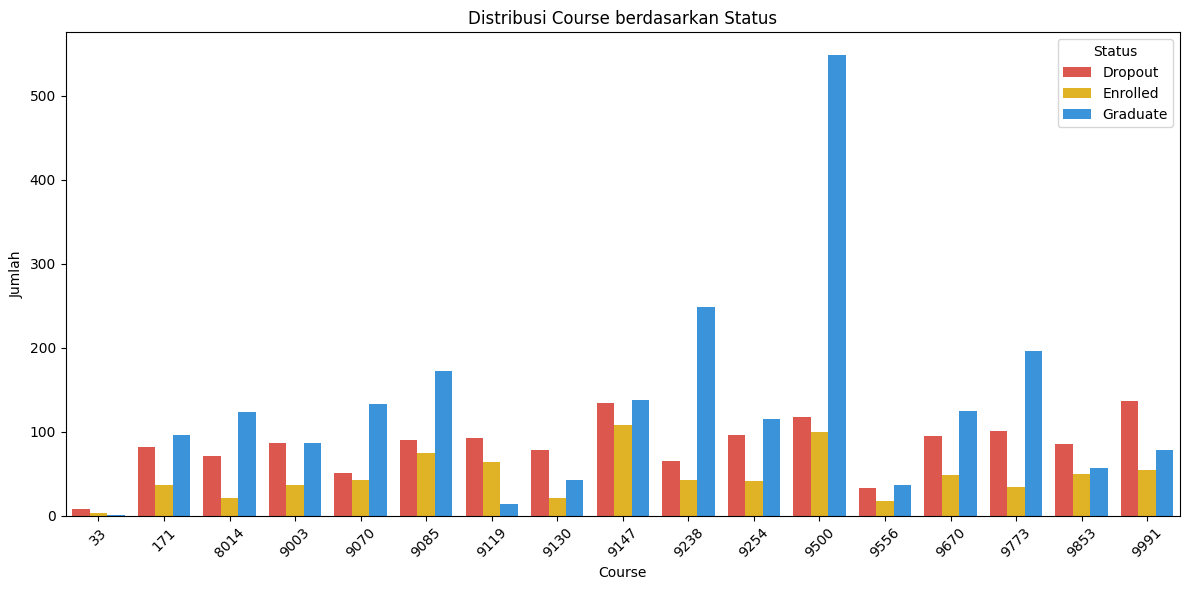

In [68]:
course_df = main_df.groupby(['Course', 'Status']).size().reset_index(name="Jumlah")

plt.figure(figsize=(12,6)) 
# Visualisasi Bar
custom_color_pallete =  ["#F44336", "#FFC107", "#2196F3", ] 
sns.barplot(data=course_df, x='Course', y='Jumlah', hue='Status', palette=custom_color_pallete)
plt.title("Distribusi Course berdasarkan Status")
plt.xlabel("Course")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [69]:
course_categorical = {
    33: "Biofuel Production Technologies",
    171: "Animation and Multimedia Design",
    8014: "Social Service (evening attendance)",
    9003: "Agronomy",
    9070: "Communication Design",
    9085: "Veterinary Nursing",
    9119: "Informatics Engineering",
    9130: "Equinculture",
    9147: "Management",
    9238: "Social Service",
    9254: "Tourism",
    9500: "Nursing",
    9556: "Oral Hygiene",
    9670: "Advertising and Marketing Management",
    9773: "Journalism and Communication",
    9853: "Basic Education",
    9991: "Management (evening attendance)"
}


course = main_df[["Course","Status"]].replace({"Course": course_categorical})
print(course.value_counts())
course_df.sum()

Course                                Status  
Nursing                               Graduate    548
Social Service                        Graduate    248
Journalism and Communication          Graduate    196
Veterinary Nursing                    Graduate    172
Management                            Graduate    138
Management (evening attendance)       Dropout     136
Management                            Dropout     134
Communication Design                  Graduate    133
Advertising and Marketing Management  Graduate    125
Social Service (evening attendance)   Graduate    123
Nursing                               Dropout     118
Tourism                               Graduate    115
Management                            Enrolled    108
Journalism and Communication          Dropout     101
Nursing                               Enrolled    100
Tourism                               Dropout      96
Animation and Multimedia Design       Graduate     96
Advertising and Marketing Managemen

Course                                               418821
Status    DropoutEnrolledGraduateDropoutEnrolledGraduate...
Jumlah                                                 4424
dtype: object

##### Ringkasan singkat:

Distribusi dataset berdasarkan "Course" dan "Status" :

- Pilihan jurusan dengan jumlah status "Graduated" tertinggi adalah jurusan Nursing dengan 548 mahasiswa, di ikuti dengan jurusan Social Service  sejumlah 248 mahasiswa dan Journalism and Communication  dengan 198 mahasiswa
- Pilihan jurusan dengan jumlah status "Dropout" tertinggi adalah jurusan Management (evening attendance) dengan 136 mahasiswa , Management dengan 134 mahasiswa dan Nursing dengan 118 mahasiswa
- Pilihan jurusan dengan jumlah status "Enrolled" tertinggi adalah jurusan Management dengan 108 mahasiswa, Nursing dengan 100 mahasiswa dan Veterinary Nursing dengan 75 mahasiswa
- Pilihan jurusan dengan jumlah status "Graduated", "Dropout", dan "Enrolled" terendah pada jurusan Biofuel Production Technologies

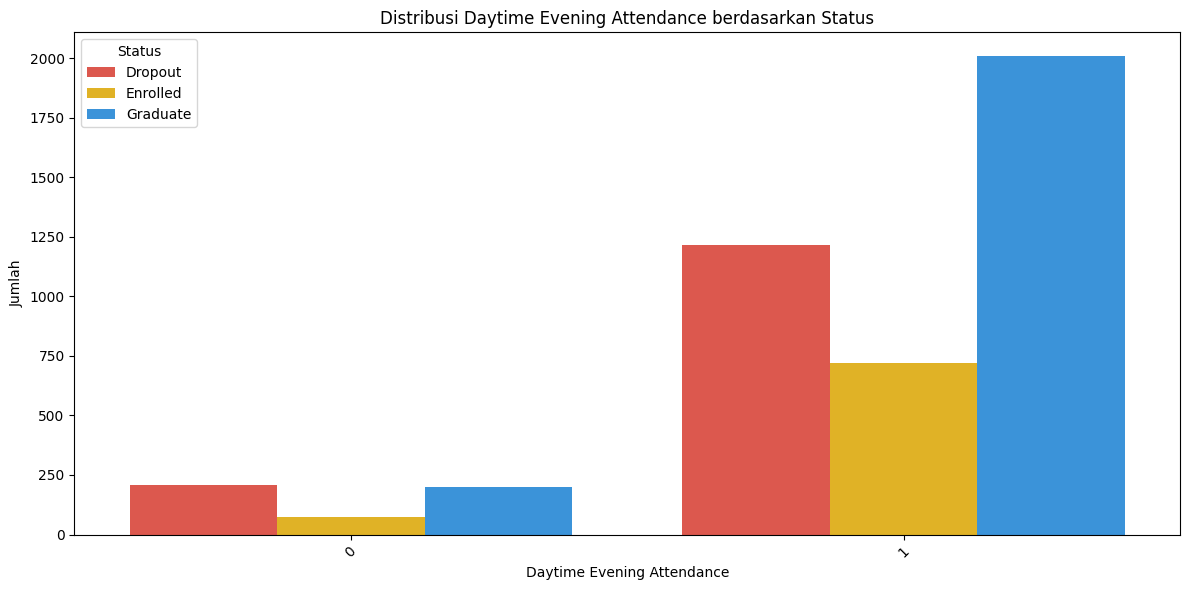

In [70]:
daytime_evening_attendance_df = main_df.groupby(['Daytime_evening_attendance', 'Status']).size().reset_index(name="Jumlah")

plt.figure(figsize=(12,6)) 
# Visualisasi Bar

custom_color_pallete =  ["#F44336", "#FFC107", "#2196F3", ] 
sns.barplot(data=daytime_evening_attendance_df, x='Daytime_evening_attendance', y='Jumlah', hue='Status', palette=custom_color_pallete)
plt.title("Distribusi Daytime Evening Attendance berdasarkan Status")
plt.xlabel("Daytime Evening Attendance")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [71]:
daytime_evening_attendance_df.value_counts()

Daytime_evening_attendance  Status    Jumlah
0                           Dropout   207       1
                            Enrolled  75        1
                            Graduate  201       1
1                           Dropout   1214      1
                            Enrolled  719       1
                            Graduate  2008      1
Name: count, dtype: int64

##### Ringkasan singkat :

Distribusi dataset berdasarkan "Daytime Evening Attendance" dan "Status" :

- Mahasiswa yang mengambil perkuliahan jam malam jika dilihat dari perbandingan antara status "Graduated" dan "Dropout" cukup signifikan, karena dengan selisih yang rendah berarti ada resiko mahasiswa yang mengambil jam malam lebih rentan untuk "Dropout"
- Mahasiswa yang mengambil perkuliahan jam pagi - sore jika dilihat daru perbandingan status "Graduated" dan "Dropout" , jumlah "Graduated" lebih tinggi dari pada jumlah "Dropout" yang artinya mahasiswa memiliki tingkat kelulusan lebih tinggi, namun meskipun begitu, jumlah mahasiswa dropout masih cukup tinggi sekitar 30% dari total mahasiswa yang mengikuti perkuliahan "Daytime"

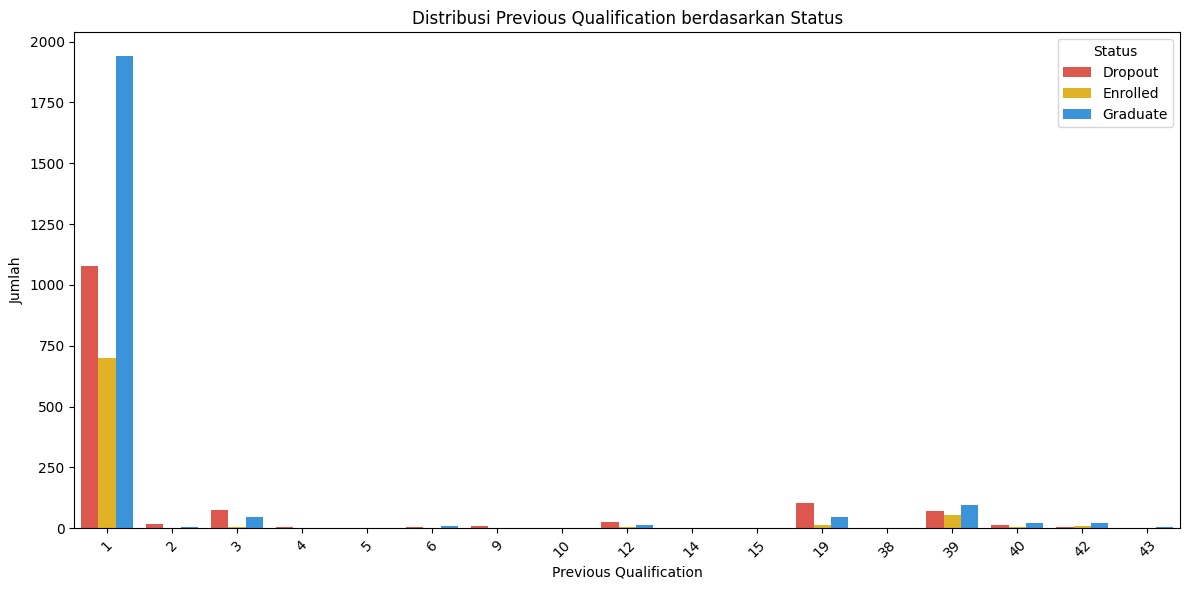

In [72]:
previous_qualification_df = main_df.groupby(['Previous_qualification', 'Status']).size().reset_index(name="Jumlah")

plt.figure(figsize=(12,6)) 
# Visualisasi Bar
custom_color_pallete =  ["#F44336", "#FFC107", "#2196F3", ] 
sns.barplot(data=previous_qualification_df, x='Previous_qualification', y='Jumlah', hue='Status', palette=custom_color_pallete)
plt.title("Distribusi Previous Qualification berdasarkan Status")
plt.xlabel("Previous Qualification")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [73]:
previous_qualifications_categorical = {
    1: "Secondary education",
    2: "Higher education - bachelor's degree",
    3: "Higher education - degree",
    4: "Higher education - master's",
    5: "Higher education - doctorate",
    6: "Frequency of higher education",
    9: "12th year of schooling - not completed",
    10: "11th year of schooling - not completed",
    12: "Other - 11th year of schooling",
    14: "10th year of schooling",
    15: "10th year of schooling - not completed",
    19: "Basic education 3rd cycle (9th/10th/11th year) or equiv.",
    38: "Basic education 2nd cycle (6th/7th/8th year) or equiv.",
    39: "Technological specialization course",
    40: "Higher education - degree (1st cycle)",
    42: "Professional higher technical course",
    43: "Higher education - master (2nd cycle)"
}


previous_qualification = main_df[["Previous_qualification","Status"]].replace({"Previous_qualification": previous_qualifications_categorical})
print(previous_qualification.value_counts())

Previous_qualification                                    Status  
Secondary education                                       Graduate    1941
                                                          Dropout     1078
                                                          Enrolled     698
Basic education 3rd cycle (9th/10th/11th year) or equiv.  Dropout      104
Technological specialization course                       Graduate      95
Higher education - degree                                 Dropout       75
Technological specialization course                       Dropout       69
                                                          Enrolled      55
Higher education - degree                                 Graduate      47
Basic education 3rd cycle (9th/10th/11th year) or equiv.  Graduate      45
Other - 11th year of schooling                            Dropout       26
Professional higher technical course                      Graduate      22
Higher education - degree (1st cy

##### Ringkasan singkat :

Distribusi dataset berdasarkan "Previous Qualification" dan "Status" :
- Mayoritas Mahasiswa Lulus dari Sekolah Menengah

    Secondary education:

    Total = 1941 (Graduate) + 1078 (Dropout) + 698 (Enrolled) = 3.717 mahasiswa

    Dropout Rate = 1078 / 3717 ≈ 29%

    Dropout Tinggi dari Pendidikan Dasar 3rd Cycle

    Dropout = 104 dari total 162

    Dropout Rate = 104 / 162 ≈ 64%

- Kursus Spesialisasi Teknologi Juga Berisiko Tinggi

    Dropout = 69 dari 219 total

    Dropout Rate = 69 / 219 ≈ 31.5%

- Mahasiswa dengan Pendidikan Tinggi Sebelumnya Lebih Stabil

    Contoh: Higher education - degree

    Graduate: 47, Dropout: 75

    Dropout Rate = 75 / (47+75+4) = 75 / 126 ≈ 59.5%

    Namun secara umum, lulusan sebelumnya dari jenjang tinggi memiliki kecenderungan menyelesaikan studi lebih baik.

Jalur Pendidikan Non-tradisional Perlu Perhatian Khusus

- Beberapa jalur seperti “Frequency of higher education” atau “Other - 11th year” memiliki dropout kecil namun signifikan secara rasio.

- Contoh: “Frequency of higher education” → 7 Dropout dari 16 total → Dropout Rate ≈ 43.75%

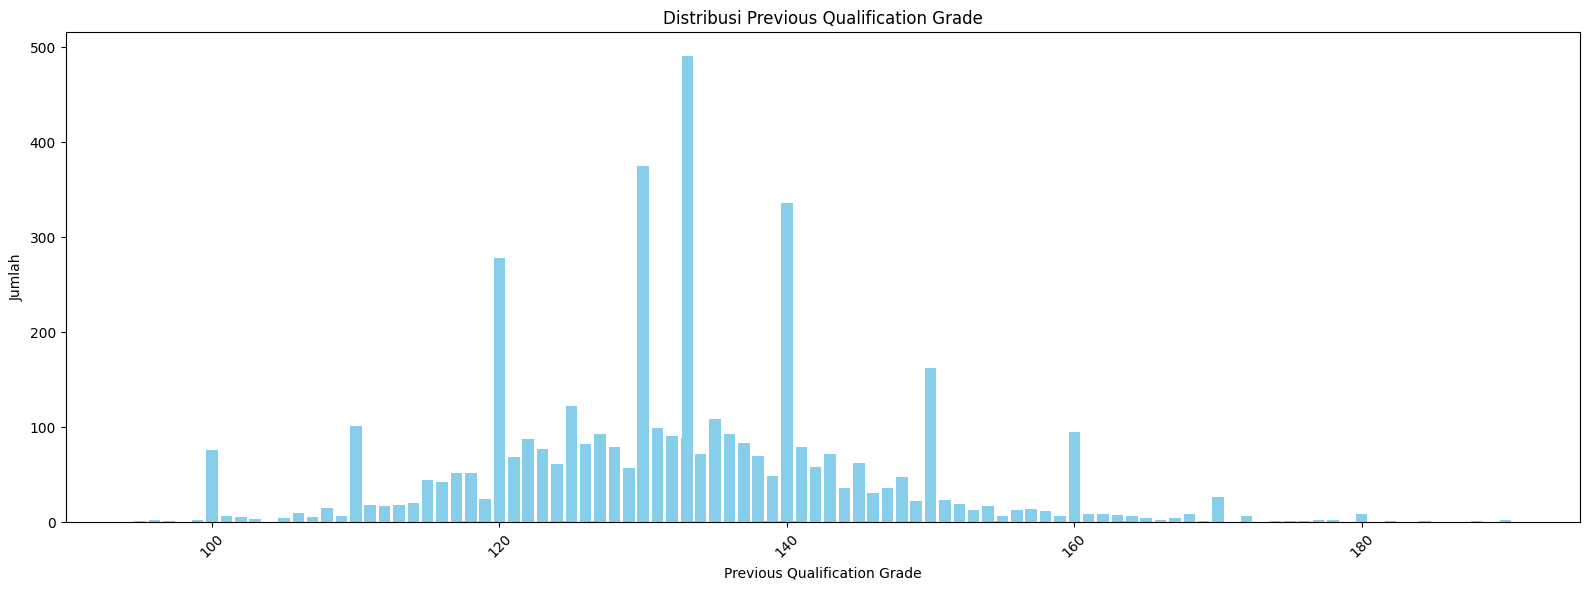

In [74]:
previous_qualification_grade_df  = main_df.groupby(['Previous_qualification_grade']).size().reset_index(name="Jumlah")

# Visualisasi Bar
plt.figure(figsize=(16,6))
plt.bar(
    previous_qualification_grade_df['Previous_qualification_grade'],  
    previous_qualification_grade_df['Jumlah'],                        
    color='skyblue'                                                   
)

plt.title("Distribusi Previous Qualification Grade")
plt.xlabel("Previous Qualification Grade")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

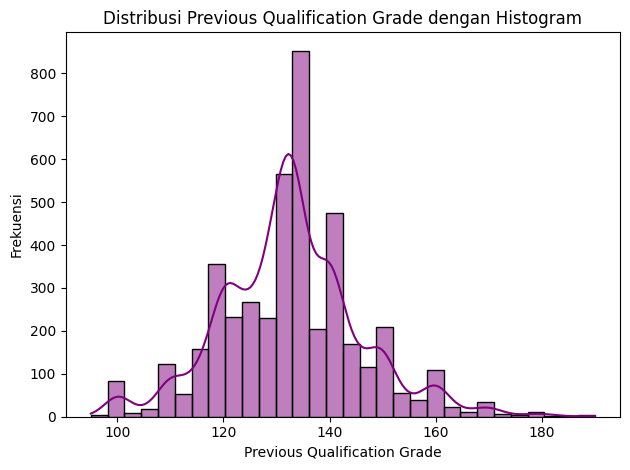

In [75]:
sns.histplot(
    data=main_df, 
    x='Previous_qualification_grade', 
    kde=True, 
    color='purple', 
    bins=30
)
plt.title("Distribusi Previous Qualification Grade dengan Histogram")
plt.xlabel("Previous Qualification Grade")
plt.ylabel("Frekuensi")
plt.tight_layout()
plt.show()

In [76]:
previous_qualification_grade_df.describe()

,Previous_qualification_grade,Jumlah
count,101.000000,101.000000
mean,138.725743,43.801980
std,24.146853,77.204925
min,95.000000,1.000000
25%,119.100000,2.000000
50%,138.600000,13.000000
75%,157.000000,62.000000
max,190.000000,491.000000


##### Ringkasan singkat :

Distribusi dataset berdasarkan "Previous Qualifiaction Grade" :
- Distribusi cenderung normal

- Nilai Rata-rata Kualifikasi Sebelum Kuliah Cenderung Sedang

    Rata-rata nilai (mean) berada di 138.7 dari maksimum 190, menunjukkan sebagian besar mahasiswa memiliki nilai sedang sebelum masuk pendidikan tinggi.

- Distribusi Jumlah Mahasiswa Sangat Tidak Merata

    Rata-rata jumlah mahasiswa per nilai adalah 43.8, namun standar deviasi tinggi (77.2), artinya ada nilai tertentu yang memiliki jumlah mahasiswa jauh lebih banyak dibanding lainnya (misalnya nilai tertinggi diikuti oleh 491 mahasiswa).

- Sebagian Besar Mahasiswa Memiliki Nilai di Kisaran 119 – 157

    Ini ditunjukkan oleh nilai kuartil ke-1 (25%) = 119.1 dan kuartil ke-3 (75%) = 157, menandakan rentang nilai umum mayoritas mahasiswa berada di antaranya.

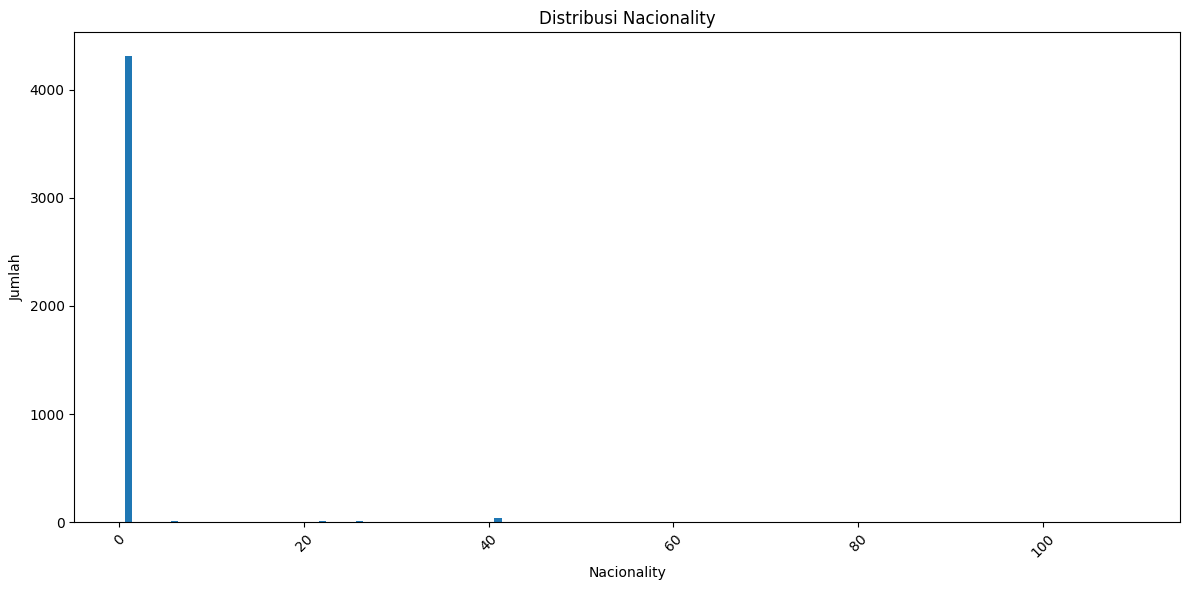

In [77]:
nacionality_df = main_df.groupby(['Nacionality']).size().reset_index(name="Jumlah")

plt.figure(figsize=(12,6)) 
# Visualisasi Bar
plt.bar(
    nacionality_df['Nacionality'],
    nacionality_df['Jumlah'],
)
plt.title("Distribusi Nacionality")
plt.xlabel("Nacionality")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [78]:
nationality_categorical = {
    1: 'Portuguese',
    2: 'German',
    6: 'Spanish',
    11: 'Italian',
    13: 'Dutch',
    14: 'English',
    17: 'Lithuanian',
    21: 'Angolan',
    22: 'Cape Verdean',
    24: 'Guinean',
    25: 'Mozambican',
    26: 'Santomean',
    32: 'Turkish',
    41: 'Brazilian',
    62: 'Romanian',
    100: 'Moldova (Republic of)',
    101: 'Mexican',
    103: 'Ukrainian',
    105: 'Russian',
    108: 'Cuban',
    109: 'Colombian'
}
nationality_categorical_count = main_df["Nacionality"].replace(nationality_categorical).value_counts()
print(nationality_categorical_count)



Nacionality
Portuguese               4314
Brazilian                  38
Santomean                  14
Spanish                    13
Cape Verdean               13
Guinean                     5
Moldova (Republic of)       3
Italian                     3
Ukrainian                   3
Romanian                    2
Angolan                     2
Mexican                     2
Mozambican                  2
German                      2
Russian                     2
Turkish                     1
Dutch                       1
Colombian                   1
Cuban                       1
English                     1
Lithuanian                  1
Name: count, dtype: int64


##### Ringkasan singkat :

Distribusi dataset berdasarkan "Nacionality" :

- Total mahasiswa adalah 4.438 orang, dengan mayoritas sekitar 97% atau 4.314 mahasiswa berasal dari Portugal.
(Perhitungan: 4314 / 4424 × 100% ≈ 97.5%)

- Mahasiswa internasional berjumlah sekitar 124 orang atau sekitar 2.8% dari total mahasiswa, dengan negara terbanyak adalah Brazil (38), Santomean (14), dan Spanish (13).

- Meskipun terdapat lebih dari 20 kebangsaan berbeda, representasi mahasiswa dari luar Portugal sangat kecil dan tidak merata, kebanyakan hanya terdiri dari 1–3 orang per negara.

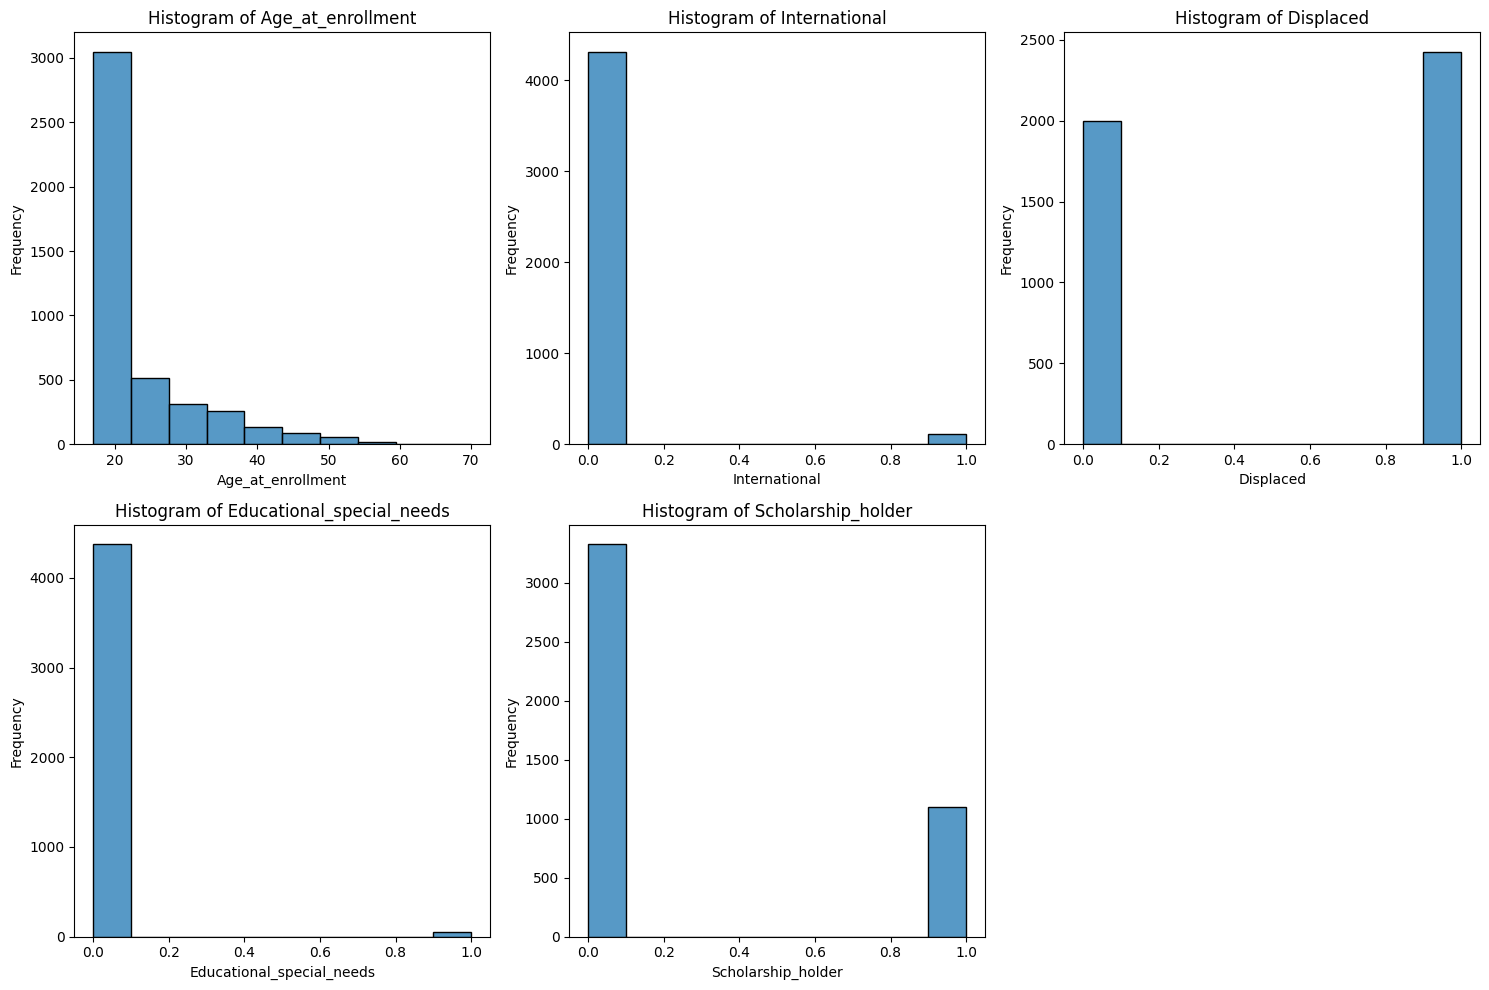

In [79]:

# plot demographic data and social, gender
demographic_social_feature = [
    'Age_at_enrollment',
    'International',
    'Displaced',
    'Educational_special_needs',
    'Scholarship_holder'
]

plt.figure(figsize=(15, 10))

for i, feature in enumerate(demographic_social_feature, 1):
    plt.subplot(2, 3, i)
    sns.histplot(main_df[feature], bins=10, kde=False)
    plt.title(f'Histogram of {feature}')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

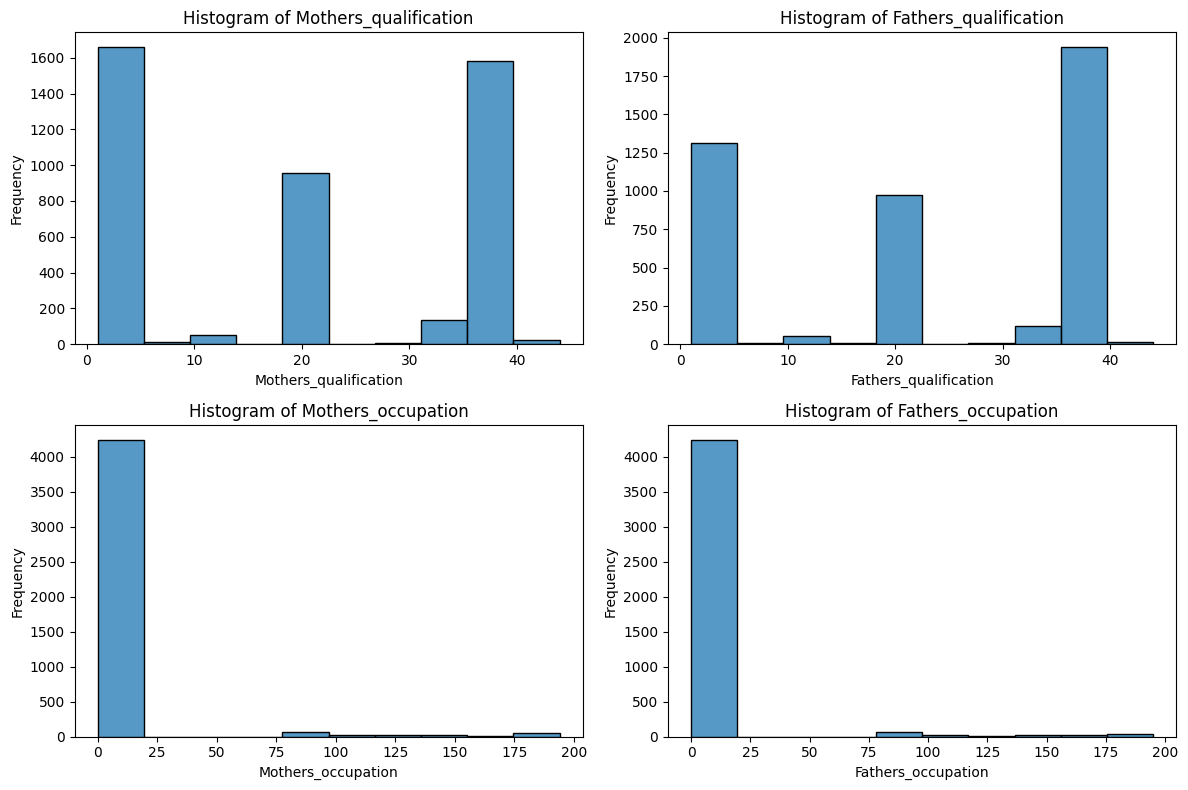

In [80]:
# plot family background data
family_background_feature = [
    'Mothers_qualification',
    'Fathers_qualification',
    'Mothers_occupation',
    'Fathers_occupation'
]

# Ukuran figure
plt.figure(figsize=(12, 8))

# Plot setiap kolom menggunakan subplot
for i, feature in enumerate(family_background_feature, 1):
    plt.subplot(2, 2, i)
    sns.histplot(main_df[feature], bins=10, kde=False)
    plt.title(f'Histogram of {feature}')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

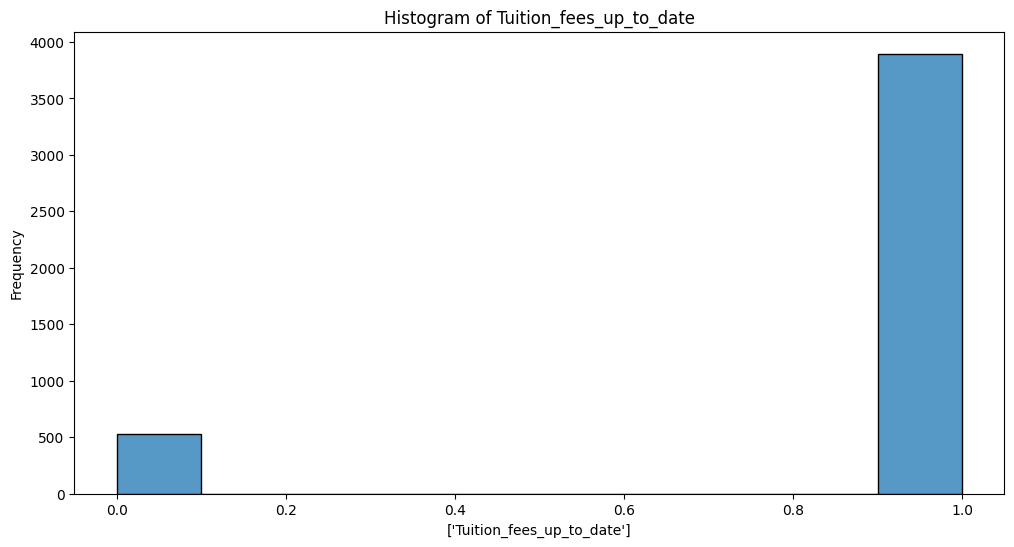

In [81]:
# economic background data
economic_student_background_feature = [
   "Tuition_fees_up_to_date"
]

plt.figure(figsize=(12, 6))
for i, feature in enumerate(economic_student_background_feature, 1):
    plt.subplot(1, 1, i)
    sns.histplot(main_df[feature], bins=10, kde=False)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(economic_student_background_feature)
    plt.ylabel('Frequency')

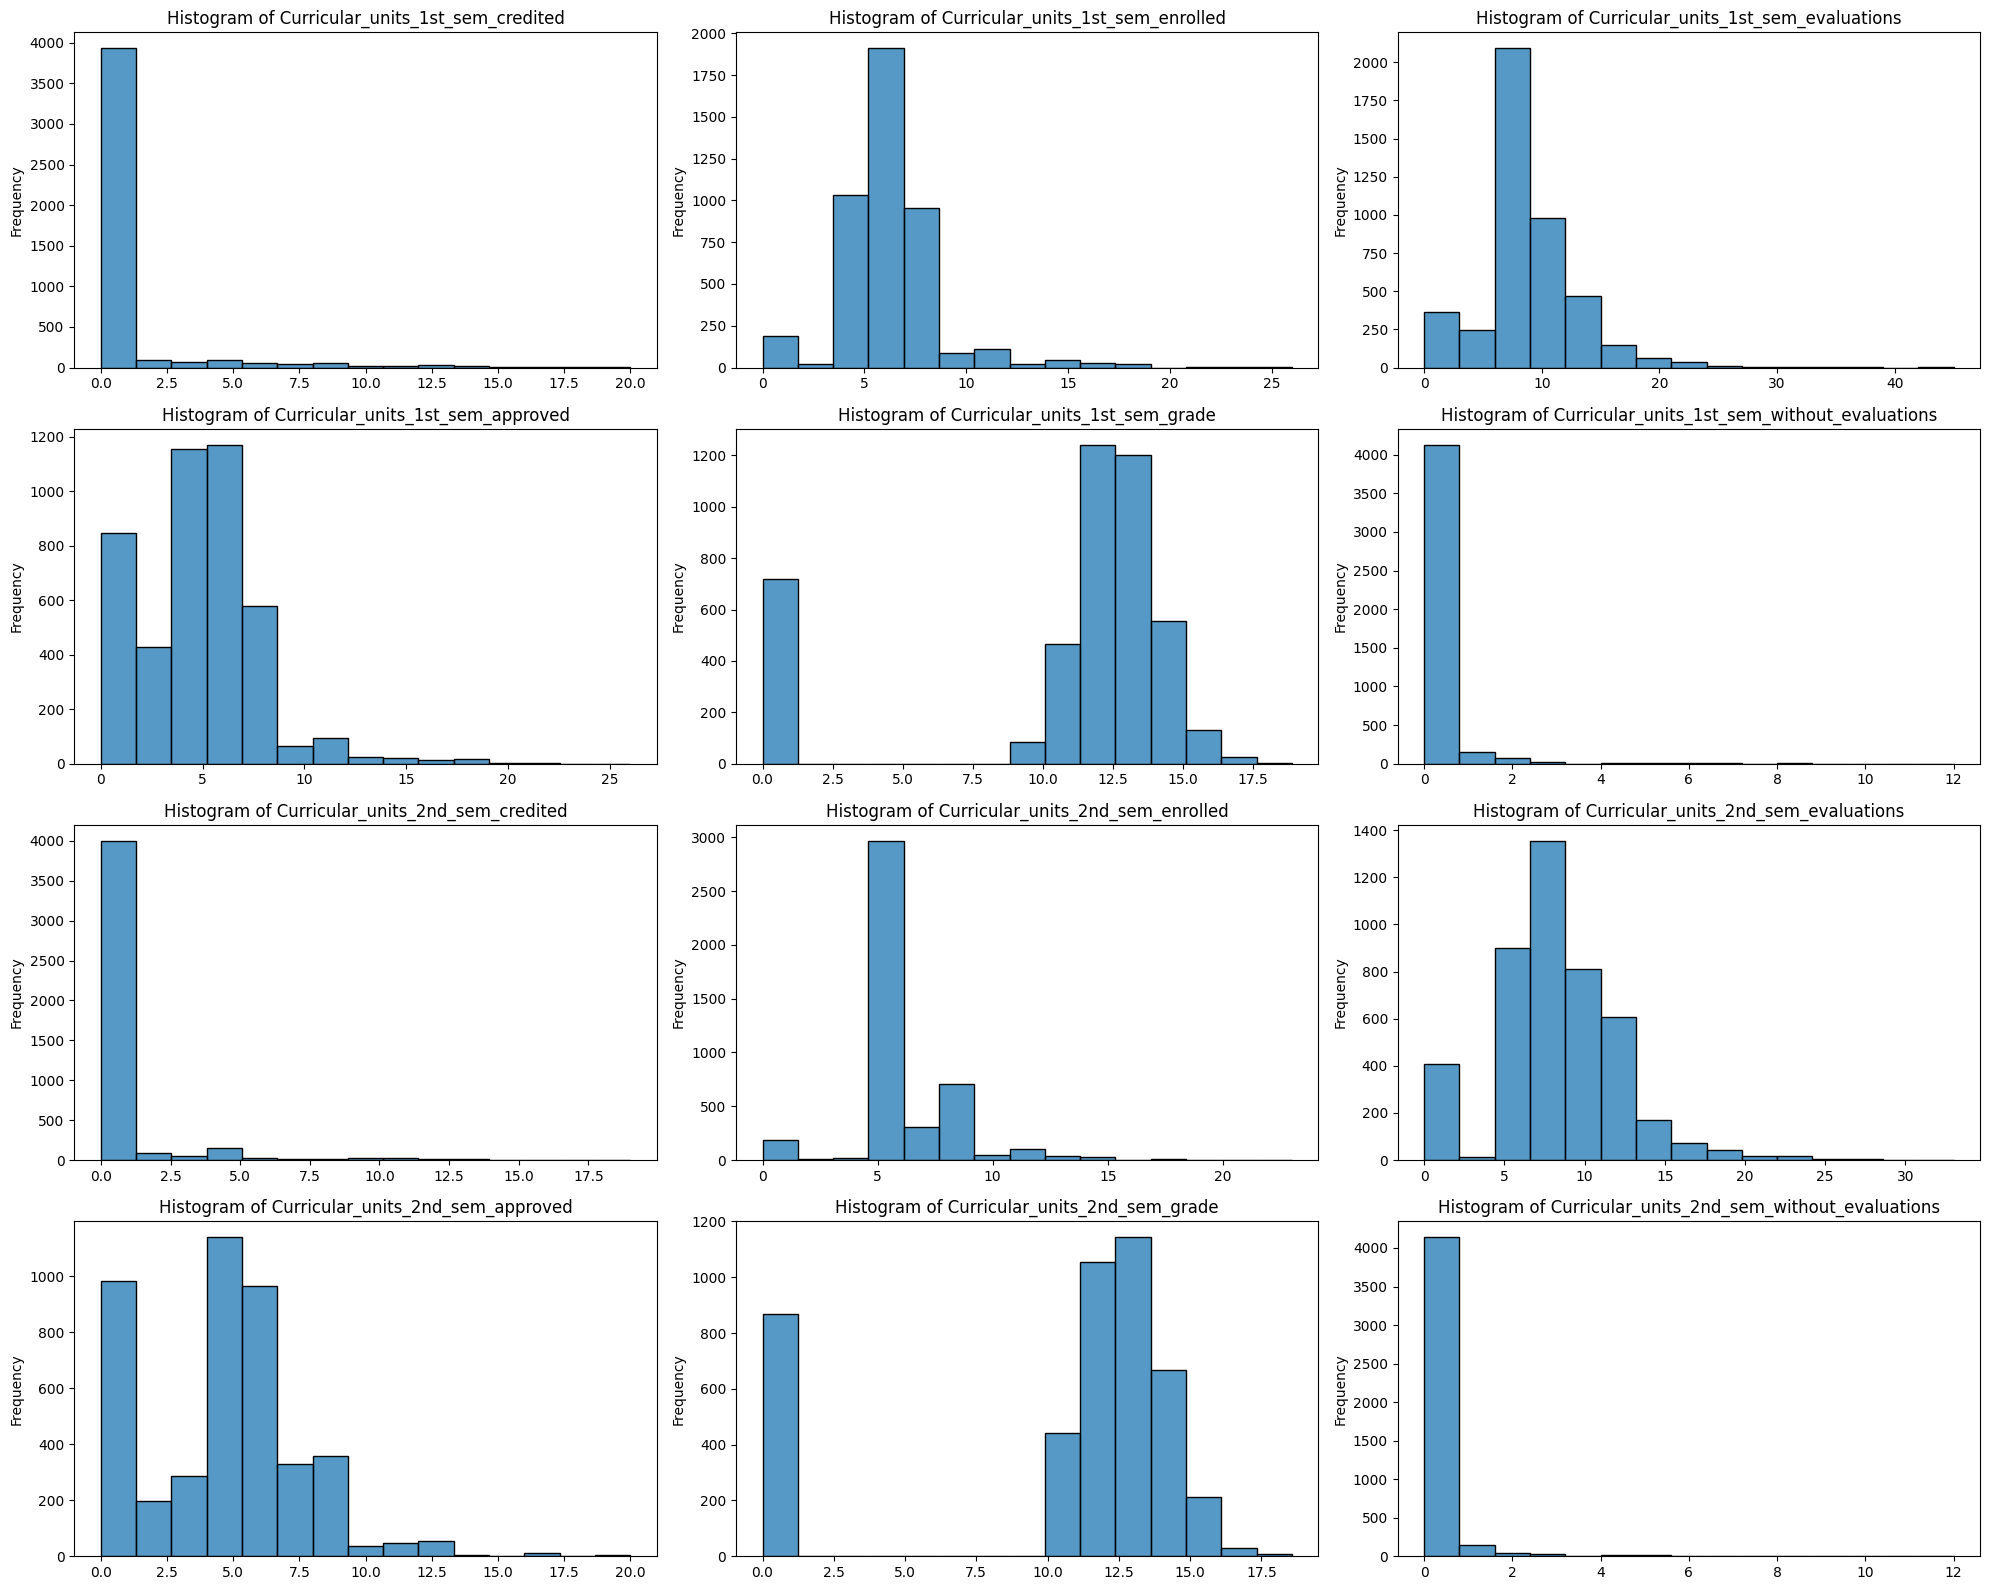

In [82]:
curricular_features = [
    'Curricular_units_1st_sem_credited',
    'Curricular_units_1st_sem_enrolled',
    'Curricular_units_1st_sem_evaluations',
    'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade',
    'Curricular_units_1st_sem_without_evaluations',
    'Curricular_units_2nd_sem_credited',
    'Curricular_units_2nd_sem_enrolled',
    'Curricular_units_2nd_sem_evaluations',
    'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_grade',
    'Curricular_units_2nd_sem_without_evaluations'
]

# Ukuran canvas
plt.figure(figsize=(20, 16))

# Looping untuk membuat subplot
for i, feature in enumerate(curricular_features, 1):
    plt.subplot(4, 3, i)  # 4 baris, 3 kolom
    sns.histplot(main_df[feature], bins=15, kde=False)
    plt.title(f'Histogram of {feature}')
    plt.xlabel('')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

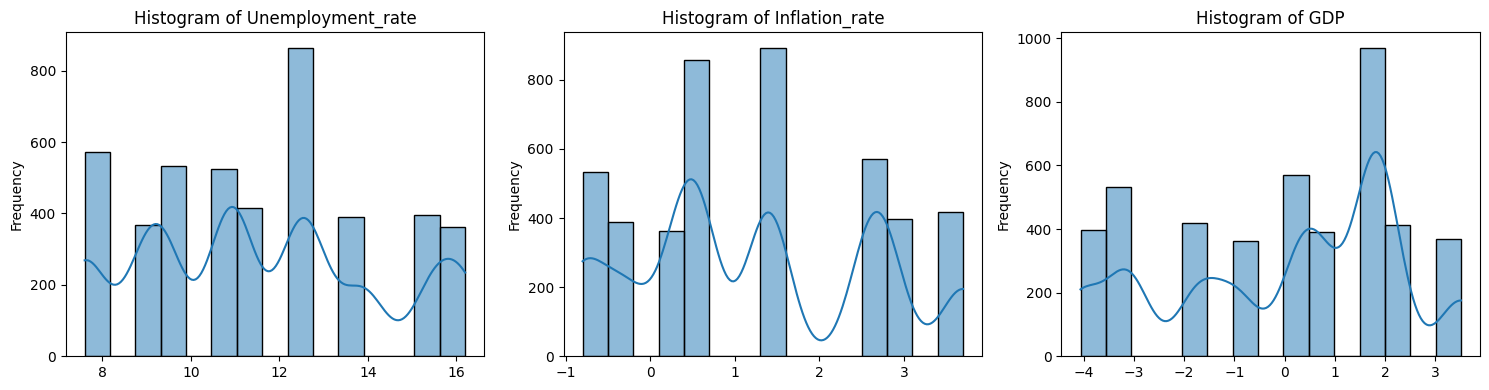

In [83]:
economic_features = ['Unemployment_rate', 'Inflation_rate', 'GDP']

# Ukuran plot
plt.figure(figsize=(15, 4))

# Looping untuk plot masing-masing fitur
for i, feature in enumerate(economic_features, 1):
    plt.subplot(1, 3, i)  # 1 baris, 3 kolom
    sns.histplot(main_df[feature], bins=15, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel('')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Korelasi terhadap Status (dari paling signifikan):
Curricular_units_2nd_sem_approved               0.624157
Curricular_units_2nd_sem_grade                  0.566827
Curricular_units_1st_sem_approved               0.529123
Curricular_units_1st_sem_grade                  0.485207
Tuition_fees_up_to_date                         0.409827
Scholarship_holder                              0.297595
Age_at_enrollment                              -0.243438
Debtor                                         -0.240999
Gender                                         -0.229270
Application_mode                               -0.221747
Curricular_units_2nd_sem_enrolled               0.175847
Curricular_units_1st_sem_enrolled               0.155974
Admission_grade                                 0.120889
Displaced                                       0.113986
Previous_qualification_grade                    0.103764
Curricular_units_2nd_sem_without_evaluations   -0.094028
Curricular_units_2nd_sem_evaluations 

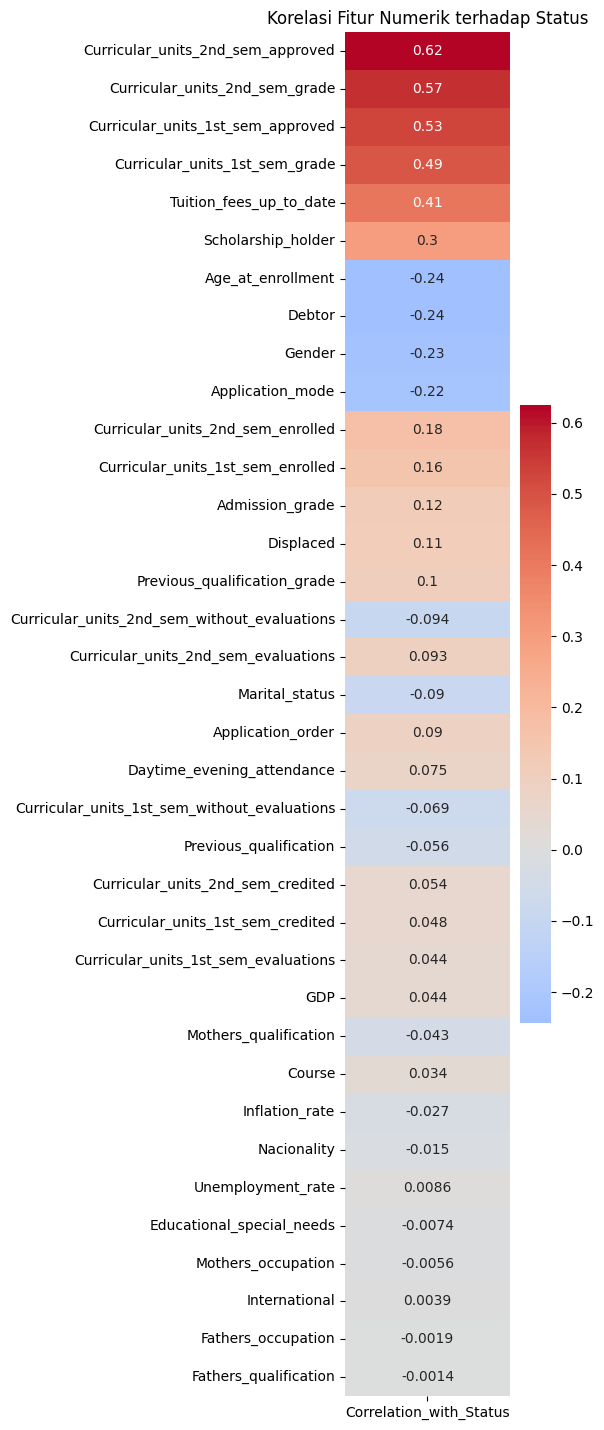

In [84]:
 #Melihat nilai korelasi fitur numerik dengan Status

# Pisahkan kolom numerik saja (tanpa mengubah Status)
numeric_cols = main_df.select_dtypes(include=['number'])

# Hitung korelasi antar kolom numerik
correlation_matrix = numeric_cols.corr()

# Cek apakah kolom 'Status' ada di original dataframe dan numerik
if 'Status' in main_df.columns and pd.api.types.is_numeric_dtype(main_df['Status']):
    Status_corr = correlation_matrix['Status'].drop('Status')
else:
    # Hitung korelasi manual antara Status (non-numerik) dan kolom numerik
    Status_corr = main_df[numeric_cols.columns].apply(lambda x: main_df['Status'].astype('category').cat.codes.corr(x))

# Urutkan korelasi berdasarkan kekuatan absolut
correlation_with_Status_sorted = Status_corr.reindex(
    Status_corr.abs().sort_values(ascending=False).index
)

# Tampilkan hasil
print("Korelasi terhadap Status (dari paling signifikan):")
print(correlation_with_Status_sorted)

correlation_df = correlation_with_Status_sorted.to_frame(name="Correlation_with_Status")

# Plot heatmap
plt.figure(figsize=(6, len(correlation_df) * 0.4))  # Sesuaikan tinggi dengan jumlah fitur
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', center=0)
plt.title("Korelasi Fitur Numerik terhadap Status")
plt.tight_layout()
plt.show()

* Beberapa fitur memiliki korlasi terhadap "Status" baik positif dan negatif

In [85]:
# 1. Seleksi semua kolom numerik + kolom target 'Status'
numerical_df = main_df.select_dtypes(include=['number']).copy()
numerical_df["Status"] = main_df["Status"]

# 2. Pisahkan fitur (X) dan target (y)
X = numerical_df.drop("Status", axis=1)
y = numerical_df["Status"]

# 3. Hapus kolom dengan nilai negatif karena tidak valid untuk chi2
X_non_negative = X.loc[:, (X >= 0).all()]

# 4. Hitung skor chi2
chi_scores, p_values = chi2(X_non_negative, y)

# 5. Buat DataFrame hasil chi2
chi2_result = pd.DataFrame({
    'Feature': X_non_negative.columns,
    'Chi2 Score': chi_scores,
    'P-Value': p_values
}).sort_values(by="Chi2 Score", ascending=False)

# 6. Tampilkan hasil
print(chi2_result)

                                         Feature   Chi2 Score        P-Value
31                Curricular_units_2nd_sem_grade  3980.634363   0.000000e+00
1                               Application_mode  3567.944852   0.000000e+00
30             Curricular_units_2nd_sem_approved  3530.526536   0.000000e+00
3                                         Course  2566.498834   0.000000e+00
24             Curricular_units_1st_sem_approved  2519.752869   0.000000e+00
25                Curricular_units_1st_sem_grade  2379.656478   0.000000e+00
10                            Mothers_occupation  1247.907383  1.047984e-271
11                            Fathers_occupation  1033.829580  3.211879e-225
19                             Age_at_enrollment   715.976606  3.370198e-156
29          Curricular_units_2nd_sem_evaluations   326.618731   1.190265e-71
5                         Previous_qualification   318.559473   6.694055e-70
8                          Mothers_qualification   317.474682   1.151460e-69

/tmp/ipykernel_4154/1087289904.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


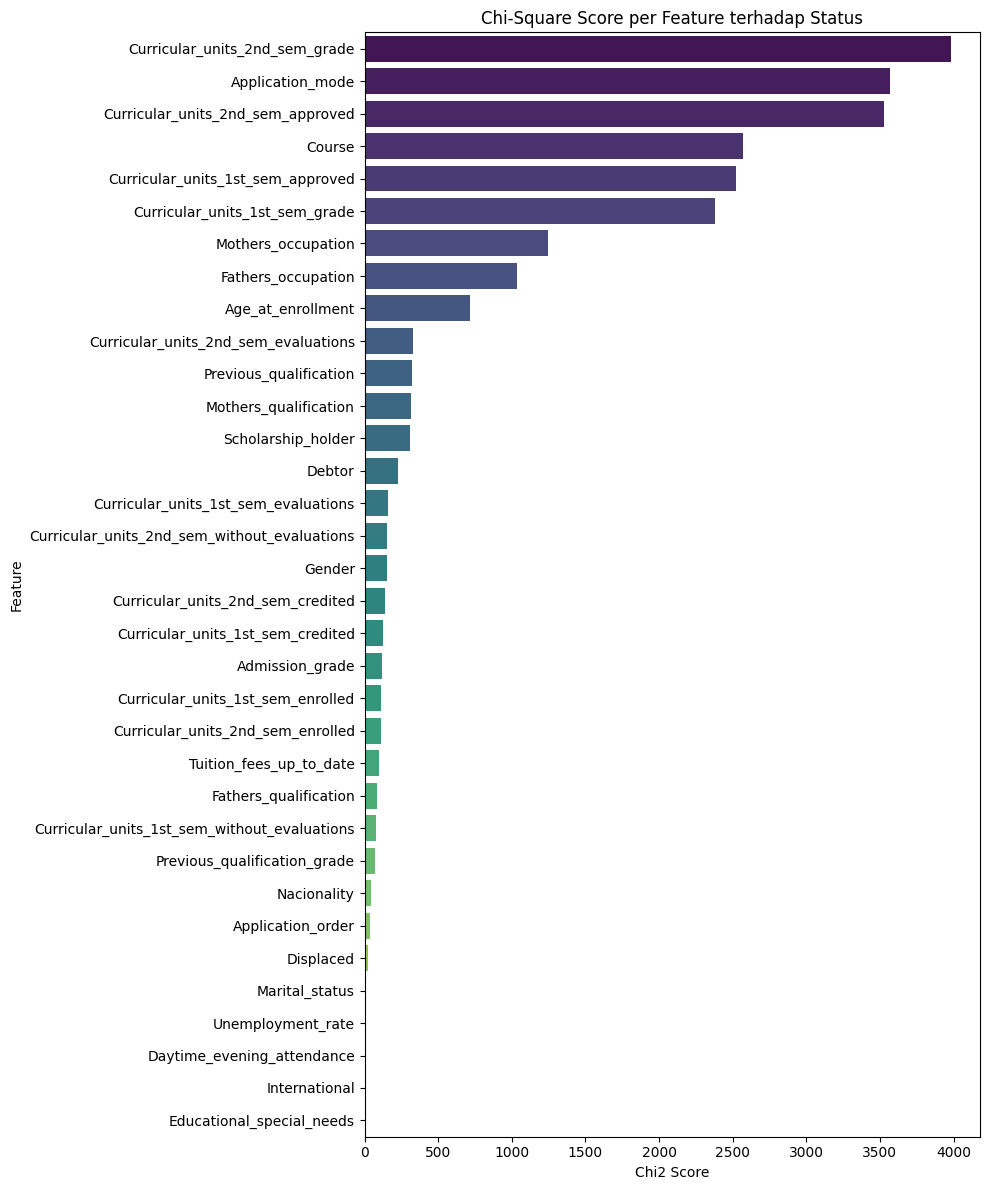

In [86]:
plt.figure(figsize=(10, 12))
sns.barplot(
    data=chi2_result,
    y="Feature",
    x="Chi2 Score",
    palette="viridis"
)
plt.title("Chi-Square Score per Feature terhadap Status")
plt.xlabel("Chi2 Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

##### Ringkasan singkat :

Berdasarkan dari pengukuran dan pemilihan fitur -fitur penting mengguanakan Chi2 :
- Fitur Akademik memiliki pengaruh dominan terhadap fitur "Status" seperti:

    Curricular_units_2nd_sem_grade (Chi2: 3980.63)

    Curricular_units_2nd_sem_approved (Chi2: 3530.52)

    Curricular_units_1st_sem_approved (Chi2: 2519.75)

    Curricular_units_1st_sem_grade (Chi2: 2379.65)

Menunjukkan pengaruh sangat signifikan terhadap status mahasiswa. Artinya, performansi akademik di semester awal sangat menentukan apakah mahasiswa akan dropout, lanjut, atau lulus.

- Jalur Masuk dan Pilihan Jurusan Juga Relevan
    Application_mode (Chi2: 3567.94) dan Course (Chi2: 2566.49) berada di posisi atas.

Ini menunjukkan bahwa jalur pendaftaran serta program studi pilihan mahasiswa memiliki korelasi tinggi terhadap keberhasilan akademik mereka.

- Faktor Orang Tua dan Latar Belakang Juga Berpengaruh
    Mothers_occupation (Chi2: 1247.90), Fathers_occupation (Chi2: 1033.82), dan Mothers_qualification (Chi2: 317.47) memberikan kontribusi yang cukup kuat.

Hal ini menandakan bahwa kondisi sosial ekonomi keluarga mahasiswa turut memengaruhi kemungkinan keberhasilan mereka.

- Beberapa Faktor Personal Relevan Secara Moderat
    Scholarship_holder (Chi2: 308.10), Debtor (Chi2: 229.84), dan Age_at_enrollment (Chi2: 715.97).

Fitur-fitur ini bisa menjadi indikator motivasi dan kesiapan finansial mahasiswa dalam menjalani studi.

- Fitur-fitur yang Tidak Signifikan
    Educational_special_needs (Chi2: 0.63), International (Chi2: 1.24), dan Displaced (Chi2: 26.08) memiliki skor sangat rendah.

Artinya, fitur ini tidak memiliki kontribusi berarti dalam membedakan status mahasiswa, dan bisa dipertimbangkan untuk dikeluarkan.

- Faktor Ekonomi Makro Hampir Tidak Memberi Dampak
Unemployment_rate, Inflation_rate, dan GDP berada di urutan terbawah.

Hal ini menyiratkan bahwa faktor eksternal seperti kondisi ekonomi negara tidak secara langsung berpengaruh terhadap status akademik mahasiswa di data ini.


## Data Preparation / Preprocessing

#### Tahapan dalam preprocessing
 1. Membaca / load dataset
 2. Check Struktur Data/ Tipe Data
 3. Menangani Missing Value
 4. Encoding fitur kategorical
 5. Feature Selection (Memilih fitur penting untuk pelatihan model)
 6. Normalisasi / Standarisasi
 7. Menghapus outlier (Opsional)
 8. Membagi dataset (split dataset train, test)

In [87]:
# load the dataset
raw_data = 'https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/students_performance/data.csv'
main_df = pd.read_csv(raw_data, sep=";")

In [88]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [89]:
main_df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [90]:
main_df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [91]:
main_df.isnull().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


In [92]:
main_df.duplicated().sum()

np.int64(0)

In [93]:
main_df.copy().to_csv("students_performance_cleaned.csv", index=False)

In [94]:
# Label encoding untuk kolom kategorikal
encoded_df = main_df.copy()

# Ambil kolom dengan tipe data object (kategorikal)
categorical_cols = encoded_df.select_dtypes(include=['object']).columns

# Inisialisasi LabelEncoder
le = LabelEncoder()

# Terapkan label encoding ke setiap kolom kategorikal
for col in categorical_cols:
    encoded_df[col] = le.fit_transform(encoded_df[col])

# Tampilkan hasil
print(encoded_df.head())

   Marital_status  Application_mode  Application_order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime_evening_attendance  Previous_qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous_qualification_grade  Nacionality  Mothers_qualification  \
0                         122.0            1                     19   
1                         160.0            1                      1   
2                         122.0            1   

In [95]:
# 1. Seleksi semua kolom numerik + kolom target 'Status'
numerical_df = encoded_df.select_dtypes(include=['number']).copy()
numerical_df["Status"] = encoded_df["Status"]

# 2. Pisahkan fitur (X) dan target (y)
X = numerical_df.drop("Status", axis=1)
y = numerical_df["Status"]

# 3. Hapus kolom dengan nilai negatif karena tidak valid untuk chi2
X_non_negative = X.loc[:, (X >= 0).all()]

# 4. Hitung skor chi2
chi_scores, p_values = chi2(X_non_negative, y)

selected_feature = chi2_result[chi2_result['P-Value'] < 0.05]['Feature'].tolist()

# 5. Buat DataFrame hasil chi2
chi2_result = pd.DataFrame({
    'Feature': X_non_negative.columns,
    'Chi2 Score': chi_scores,
    'P-Value': p_values
}).sort_values(by="Chi2 Score", ascending=False)

# 6. Tampilkan hasil
print(chi2_result)

                                         Feature   Chi2 Score        P-Value
31                Curricular_units_2nd_sem_grade  3980.634363   0.000000e+00
1                               Application_mode  3567.944852   0.000000e+00
30             Curricular_units_2nd_sem_approved  3530.526536   0.000000e+00
3                                         Course  2566.498834   0.000000e+00
24             Curricular_units_1st_sem_approved  2519.752869   0.000000e+00
25                Curricular_units_1st_sem_grade  2379.656478   0.000000e+00
10                            Mothers_occupation  1247.907383  1.047984e-271
11                            Fathers_occupation  1033.829580  3.211879e-225
19                             Age_at_enrollment   715.976606  3.370198e-156
29          Curricular_units_2nd_sem_evaluations   326.618731   1.190265e-71
5                         Previous_qualification   318.559473   6.694055e-70
8                          Mothers_qualification   317.474682   1.151460e-69

In [96]:
print(selected_feature)
main_df[selected_feature].describe()

['Curricular_units_2nd_sem_grade', 'Application_mode', 'Curricular_units_2nd_sem_approved', 'Course', 'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade', 'Mothers_occupation', 'Fathers_occupation', 'Age_at_enrollment', 'Curricular_units_2nd_sem_evaluations', 'Previous_qualification', 'Mothers_qualification', 'Scholarship_holder', 'Debtor', 'Curricular_units_1st_sem_evaluations', 'Curricular_units_2nd_sem_without_evaluations', 'Gender', 'Curricular_units_2nd_sem_credited', 'Curricular_units_1st_sem_credited', 'Admission_grade', 'Curricular_units_1st_sem_enrolled', 'Curricular_units_2nd_sem_enrolled', 'Tuition_fees_up_to_date', 'Fathers_qualification', 'Curricular_units_1st_sem_without_evaluations', 'Previous_qualification_grade', 'Nacionality', 'Application_order', 'Displaced', 'Marital_status', 'Unemployment_rate']


,Curricular_units_2nd_sem_grade,Application_mode,Curricular_units_2nd_sem_approved,Course,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Mothers_occupation,Fathers_occupation,Age_at_enrollment,Curricular_units_2nd_sem_evaluations,...,Curricular_units_2nd_sem_enrolled,Tuition_fees_up_to_date,Fathers_qualification,Curricular_units_1st_sem_without_evaluations,Previous_qualification_grade,Nacionality,Application_order,Displaced,Marital_status,Unemployment_rate
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,10.230206,18.669078,4.435805,8856.642631,4.706600,10.640822,10.960895,11.032324,23.265145,8.063291,...,6.232143,0.880651,22.275316,0.137658,132.613314,1.873192,1.727848,0.548373,1.178571,11.566139
std,5.210808,17.484682,3.014764,2063.566416,3.094238,4.843663,26.418253,25.263040,7.587816,3.947951,...,2.195951,0.324235,15.343108,0.690880,13.188332,6.914514,1.313793,0.497711,0.605747,2.663850
min,0.000000,1.000000,0.000000,33.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,95.000000,1.000000,0.000000,0.000000,1.000000,7.600000
25%,10.750000,1.000000,2.000000,9085.000000,3.000000,11.000000,4.000000,4.000000,19.000000,6.000000,...,5.000000,1.000000,3.000000,0.000000,125.000000,1.000000,1.000000,0.000000,1.000000,9.400000
50%,12.200000,17.000000,5.000000,9238.000000,5.000000,12.285714,5.000000,7.000000,20.000000,8.000000,...,6.000000,1.000000,19.000000,0.000000,133.100000,1.000000,1.000000,1.000000,1.000000,11.100000
75%,13.333333,39.000000,6.000000,9556.000000,6.000000,13.400000,9.000000,9.000000,25.000000,10.000000,...,7.000000,1.000000,37.000000,0.000000,140.000000,1.000000,2.000000,1.000000,1.000000,13.900000
max,18.571429,57.000000,20.000000,9991.000000,26.000000,18.875000,194.000000,195.000000,70.000000,33.000000,...,23.000000,1.000000,44.000000,12.000000,190.000000,109.000000,9.000000,1.000000,6.000000,16.200000


In [97]:
X = X[selected_feature]
y = numerical_df["Status"]

# StandardScaler untuk fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
# Display the class distribution after resampling
print("Class distribution after SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

Class distribution after SMOTE:
Status
0    1791
1    1791
2    1791
Name: count, dtype: int64


/tmp/ipykernel_4154/2524894849.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=before_smote.index, y=before_smote.values, ax=axes[0], palette="viridis")
/tmp/ipykernel_4154/2524894849.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=after_smote.index, y=after_smote.values, ax=axes[1], palette="viridis")


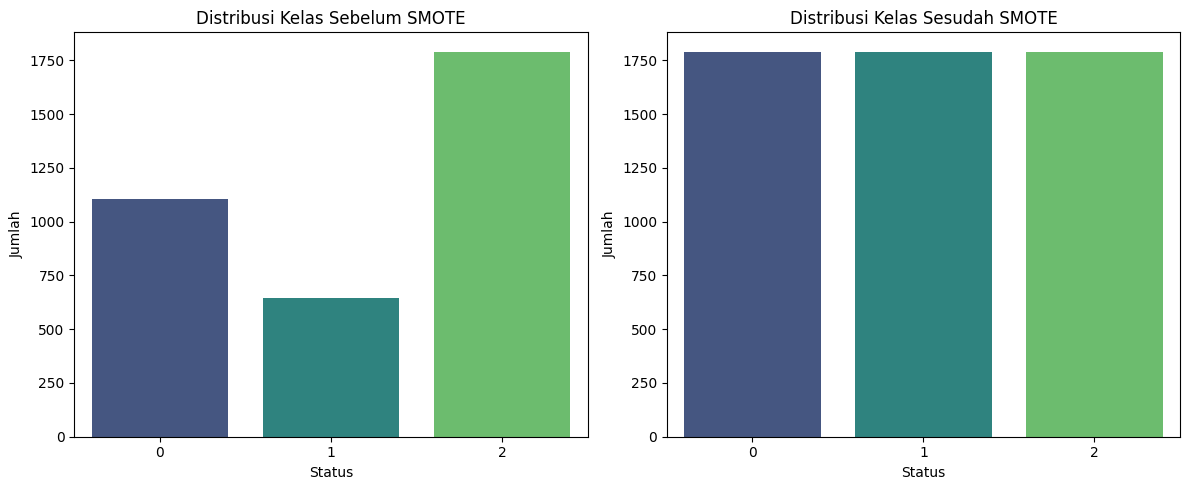

In [98]:


# Distribusi sebelum SMOTE (pada data train asli)
before_smote = pd.Series(y_train).value_counts().sort_index()

# Distribusi sesudah SMOTE (data train setelah resampling)
after_smote = pd.Series(y_train_resampled).value_counts().sort_index()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot distribusi sebelum SMOTE
sns.barplot(x=before_smote.index, y=before_smote.values, ax=axes[0], palette="viridis")
axes[0].set_title("Distribusi Kelas Sebelum SMOTE")
axes[0].set_xlabel("Status")
axes[0].set_ylabel("Jumlah")

# Plot distribusi sesudah SMOTE
sns.barplot(x=after_smote.index, y=after_smote.values, ax=axes[1], palette="viridis")
axes[1].set_title("Distribusi Kelas Sesudah SMOTE")
axes[1].set_xlabel("Status")
axes[1].set_ylabel("Jumlah")

plt.tight_layout()
plt.show()


## Modeling

In [99]:
# Dictionary untuk menyimpan hasil prediksi tiap model
predictions = {}
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    "SVM": SVC()
}

# Training dan evaluasi awal (tanpa visualisasi)
for name, model in models.items():
    print(f"\nModel: {name}")
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)

    # Simpan hasil prediksi untuk evaluasi visual nanti
    predictions[name] = (model, y_pred)

    # Evaluasi numerik
    print("Akurasi:", accuracy_score(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))


Model: Logistic Regression
Akurasi: 0.735593220338983
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.73      0.78       316
           1       0.40      0.51      0.45       151
           2       0.82      0.82      0.82       418

    accuracy                           0.74       885
   macro avg       0.69      0.69      0.68       885
weighted avg       0.76      0.74      0.74       885


Model: Random Forest
Akurasi: 0.7661016949152543
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.74      0.79       316
           1       0.49      0.50      0.50       151
           2       0.81      0.88      0.84       418

    accuracy                           0.77       885
   macro avg       0.72      0.71      0.71       885
weighted avg       0.77      0.77      0.77       885


Model: XGBoost


/home/avelineyn/miniconda3/envs/edutech/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:48:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Akurasi: 0.7604519774011299
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.73      0.78       316
           1       0.47      0.42      0.44       151
           2       0.80      0.90      0.85       418

    accuracy                           0.76       885
   macro avg       0.70      0.69      0.69       885
weighted avg       0.76      0.76      0.76       885


Model: SVM
Akurasi: 0.7333333333333333
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.69      0.78       316
           1       0.39      0.52      0.45       151
           2       0.80      0.84      0.82       418

    accuracy                           0.73       885
   macro avg       0.69      0.68      0.68       885
weighted avg       0.76      0.73      0.74       885



## Evaluation


Confusion Matrix - Logistic Regression


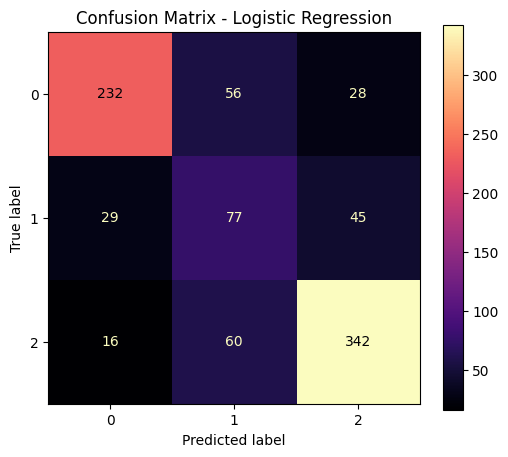


Confusion Matrix - Random Forest


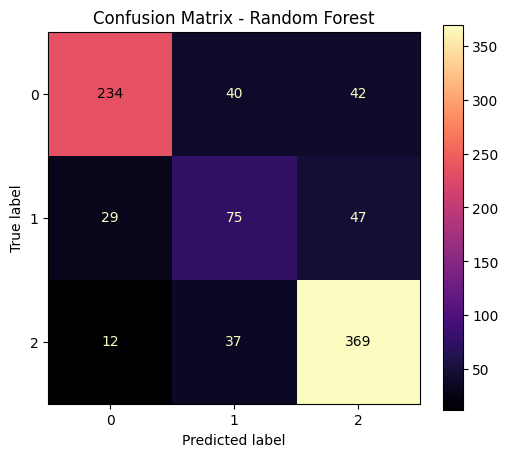


Confusion Matrix - XGBoost


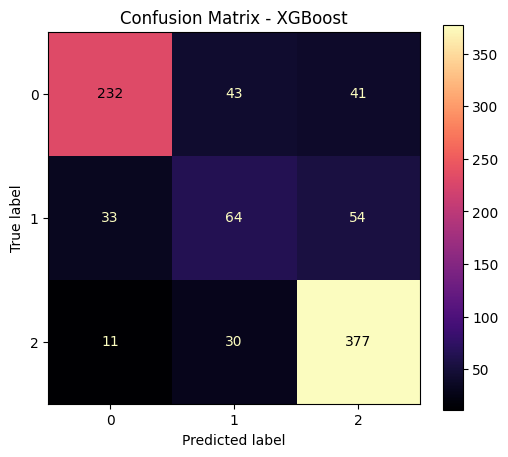


Confusion Matrix - SVM


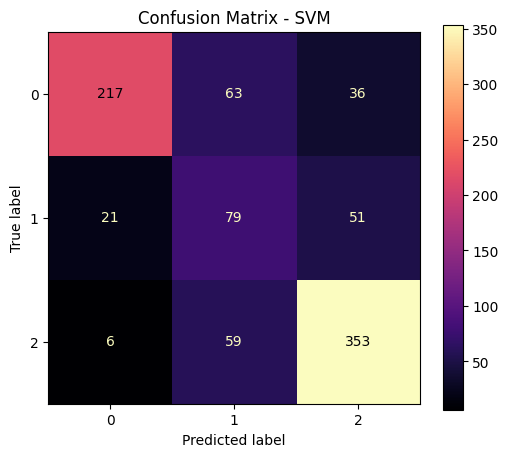

In [100]:
# Menampilkan Confusion Matrix untuk setiap model
for name, (model, y_pred) in predictions.items():
    print(f"\nConfusion Matrix - {name}")
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_ if hasattr(model, "classes_") else None)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=model.classes_ if hasattr(model, "classes_") else None)
    fig, ax = plt.subplots(figsize=(6, 5))
    disp.plot(ax=ax, cmap="magma")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

In [101]:
# export models
joblib.dump(scaler, 'model/scaler.pkl')
for name, model in models.items():
    joblib.dump(model, f'model/{name.lower().replace(" ", "_")}.pkl')
    print(f"Model {name} saved as {name.lower().replace(' ', '_')}.pkl")

Model Logistic Regression saved as logistic_regression.pkl
Model Random Forest saved as random_forest.pkl
Model XGBoost saved as xgboost.pkl
Model SVM saved as svm.pkl


In [102]:
# create requirements.txt
!pip install pipreqs
!pip install pipreqsnb

!pipreqs --force --ignore model,*.ipynb .
!pipreqsnb --force --ignore model,*.ipynb .``

INFO: Not scanning for jupyter notebooks.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
INFO: Successfully saved requirements file in ./requirements.txt
pipreqs  --force --ignore model,*.ipynb .
INFO: Not scanning for jupyter notebooks.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
INFO: Suc